In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [112]:
# what can extract from this data in order to create actionable business insights?
    # what is the breakdown of business vs. personal trips? 
    # what are the most common start and end locations?
    # what is the distribution of trip distances? Are most trips short or long-distance?
    # what are the busiest times for rides?
    # how does purpose affect the length of the ride?
    # average trip duration?

data_path = 'data/UberDataset.csv'
df = pd.read_csv(data_path)

In [113]:
print(f"The first and last rows of data:\n ")
print(df.head(-1))

The first and last rows of data:
 
            START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1150   12/31/2016 1:07   12/31/2016 1:14  Business           Kar?chi   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   

                  STOP  MILES          PURPOSE  
0          Fort Pierce    5.1   Meal/Entertain  
1 

In [114]:
print(f"\n General info regarding {data_path}\n")
df.info()

# all strings with the exception of miles
# will need to address the encoding issue with 'Kar?chi'


 General info regarding data/UberDataset.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [115]:
print(f"\nThe data's shape is: {df.shape}\n")


The data's shape is: (1156, 7)



In [116]:
print(f"The following is descriptive statistics for miles:\n")
df.describe()

# there's clearly an outlier within the max

The following is descriptive statistics for miles:



,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [117]:
print("Amount of null values within each column:")
print(df.isnull().sum())

print("\nAmount of unique values within each column:")
print(df.nunique())


if df.duplicated().any() == True:
    print("\n The following rows are duplicates:")
    print(df.loc[df.duplicated(keep='first')])
    print(df.loc[df.duplicated(keep='last')])
else:
    print('There are no duplicate rides.')

# will need to take a close look at where these null values are located and also handle the PURPOSE column


Amount of null values within each column:
START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

Amount of unique values within each column:
START_DATE    1155
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          257
PURPOSE         10
dtype: int64

 The following rows are duplicates:
          START_DATE         END_DATE  CATEGORY   START  STOP  MILES  PURPOSE
492  6/28/2016 23:34  6/28/2016 23:59  Business  Durham  Cary    9.9  Meeting
          START_DATE         END_DATE  CATEGORY   START  STOP  MILES  PURPOSE
491  6/28/2016 23:34  6/28/2016 23:59  Business  Durham  Cary    9.9  Meeting


     START_DATE END_DATE CATEGORY START STOP    MILES PURPOSE
1155     Totals      NaN      NaN   NaN  NaN  12204.7     NaN


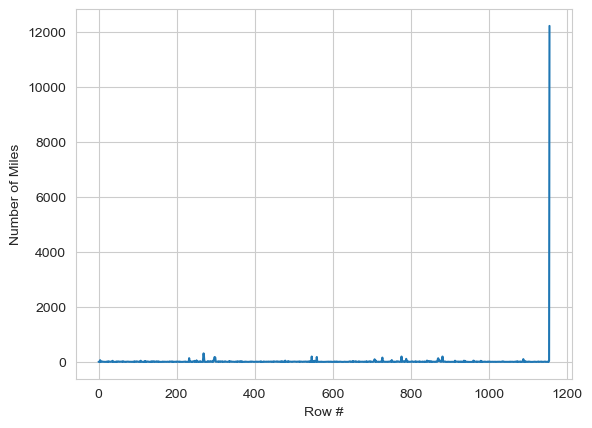

In [118]:
# outliers check for numerical columns (miles)
df['MILES'].plot(xlabel='Row #', ylabel='Number of Miles')
print(df[df['MILES'] > 500])


In [119]:
# check on the unique values for characteristic features
print('The unique values for CATEGORY:')
print(df['CATEGORY'].unique())
print()
print('The unique values for PURPOSE:')
print(df['PURPOSE'].unique())

The unique values for CATEGORY:
['Business' 'Personal' nan]

The unique values for PURPOSE:
['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


In [120]:
# data cleaning & preparation
# 1) Clean & fix outlier and duplicate values

df.drop_duplicates(inplace=True)

# removes a mostly null row with an absurd amount of miles
print('Dropping row 1155:')
try:
    df.drop(1155, inplace=True)
    print('Dropped row 1155.')
except Exception as e:
    print('Row 1155 was already dropped')

print('\nUpdated Overview:')
print(df.shape)
print("Amount of null values within each column:")
print(df.isnull().sum())



Dropping row 1155:
Dropped row 1155.

Updated Overview:
(1154, 7)
Amount of null values within each column:
START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64


In [121]:
# 2) Fix 'Kar?chi' and handle Unknown Location in START/STOP
# most likely results from an encoding error with the csv files and refers to the city Karachi in Pakistan

print(df[df['START'] == 'Kar?chi'])

df['START'].replace('Kar?chi', 'Karachi', regex=False, inplace=True)
df['STOP'].replace('Kar?chi', 'Karachi', regex=False, inplace=True)

print('fix applied:')
print(df[df['START'] == 'Karachi'])

            START_DATE          END_DATE  CATEGORY    START              STOP  \
1119   12/27/2016 7:02   12/27/2016 7:14  Business  Kar?chi           Kar?chi   
1120   12/27/2016 8:37   12/27/2016 8:59  Business  Kar?chi           Kar?chi   
1121  12/27/2016 12:53  12/27/2016 12:57  Business  Kar?chi           Kar?chi   
1122  12/27/2016 14:49  12/27/2016 15:03  Business  Kar?chi  Unknown Location   
1124  12/27/2016 19:19  12/27/2016 19:50  Business  Kar?chi           Kar?chi   
1125   12/28/2016 8:34   12/28/2016 9:06  Business  Kar?chi  Unknown Location   
1127  12/28/2016 13:53  12/28/2016 14:01  Business  Kar?chi           Kar?chi   
1128  12/28/2016 15:04  12/28/2016 15:39  Business  Kar?chi  Unknown Location   
1130  12/28/2016 18:33  12/28/2016 18:56  Business  Kar?chi           Kar?chi   
1131  12/28/2016 22:44  12/28/2016 23:18  Business  Kar?chi           Kar?chi   
1132   12/29/2016 0:49   12/29/2016 1:06  Business  Kar?chi           Kar?chi   
1133   12/29/2016 9:44  12/2

In [122]:
# let's check on the 'Unknown Location' values and determine how to handle them.

unknown_starts = df[df['START'] == 'Unknown Location'].shape[0]
unknown_stops = df[df['STOP'] == 'Unknown Location'].shape[0]
unknown_both = df[(df['START'] == 'Unknown Location') & (df['STOP'] == 'Unknown Location')].shape[0]


print(f"Number of trips with an unknown START: {unknown_starts}")
print(f"Number of trips with an unknown STOP: {unknown_stops}")
print(f"Number of trips with both START and STOP unknown: {unknown_both}")


total_rows = len(df)
print(f"Percentage of unknown starts: { (unknown_starts / total_rows) * 100:.2f}%\n")

print(f'The {total_rows} rows w/ "Unknown Location":')
print(df[df['START'] == 'Unknown Location'])

# for now we'll hold onto the "Unknown Location" rows as they make up a significant amount (~12%) of the data
# however, when answering questions regarding location, we'll use a dataframe that excludes Unknown Location
df_locations_cleaned = df[(df['START'] != 'Unknown Location') & (df['STOP'] != 'Unknown Location')]

Number of trips with an unknown START: 148
Number of trips with an unknown STOP: 149
Number of trips with both START and STOP unknown: 86
Percentage of unknown starts: 12.82%

The 1154 rows w/ "Unknown Location":
            START_DATE          END_DATE  CATEGORY             START  \
109     2/16/2016 8:29    2/16/2016 9:34  Business  Unknown Location   
117    2/17/2016 13:18   2/17/2016 14:04  Business  Unknown Location   
121     2/18/2016 8:19    2/18/2016 8:27  Business  Unknown Location   
122    2/18/2016 14:03   2/18/2016 14:45  Business  Unknown Location   
124    2/18/2016 18:44   2/18/2016 18:58  Business  Unknown Location   
...                ...               ...       ...               ...   
1129  12/28/2016 17:02  12/28/2016 17:16  Business  Unknown Location   
1134  12/29/2016 11:28  12/29/2016 12:00  Business  Unknown Location   
1141  12/29/2016 19:50  12/29/2016 20:10  Business  Unknown Location   
1144  12/29/2016 23:14  12/29/2016 23:47  Business  Unknown Locatio

In [123]:
# 3) fix date format for all rows

print(df[['START_DATE','END_DATE']])

try:
    df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='mixed')
    df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='mixed')
    print('Completed datetime conversion.\n')
except Exception as e:
    print('Unable to complete datetime conversion.\n')

print(df[['START_DATE', 'END_DATE']])


print(df.info())


            START_DATE          END_DATE
0     01-01-2016 21:11  01-01-2016 21:17
1     01-02-2016 01:25  01-02-2016 01:37
2     01-02-2016 20:25  01-02-2016 20:38
3     01-05-2016 17:31  01-05-2016 17:45
4     01-06-2016 14:42  01-06-2016 15:49
...                ...               ...
1150   12/31/2016 1:07   12/31/2016 1:14
1151  12/31/2016 13:24  12/31/2016 13:42
1152  12/31/2016 15:03  12/31/2016 15:38
1153  12/31/2016 21:32  12/31/2016 21:50
1154  12/31/2016 22:08  12/31/2016 23:51

[1154 rows x 2 columns]
Completed datetime conversion.

              START_DATE            END_DATE
0    2016-01-01 21:11:00 2016-01-01 21:17:00
1    2016-01-02 01:25:00 2016-01-02 01:37:00
2    2016-01-02 20:25:00 2016-01-02 20:38:00
3    2016-01-05 17:31:00 2016-01-05 17:45:00
4    2016-01-06 14:42:00 2016-01-06 15:49:00
...                  ...                 ...
1150 2016-12-31 01:07:00 2016-12-31 01:14:00
1151 2016-12-31 13:24:00 2016-12-31 13:42:00
1152 2016-12-31 15:03:00 2016-12-31 15:38:00
1

In [124]:
# 4) feature engineer a DURATION (minutes) column from START_DATE & END_DATE

df['DURATION'] = df['END_DATE'] - df['START_DATE']

print(df[['START_DATE', 'END_DATE', 'DURATION']].head())

# convert to minutes
df['DURATION'] = df['DURATION'].dt.total_seconds() / 60

print(df[['START_DATE', 'END_DATE', 'DURATION']].head())


           START_DATE            END_DATE        DURATION
0 2016-01-01 21:11:00 2016-01-01 21:17:00 0 days 00:06:00
1 2016-01-02 01:25:00 2016-01-02 01:37:00 0 days 00:12:00
2 2016-01-02 20:25:00 2016-01-02 20:38:00 0 days 00:13:00
3 2016-01-05 17:31:00 2016-01-05 17:45:00 0 days 00:14:00
4 2016-01-06 14:42:00 2016-01-06 15:49:00 0 days 01:07:00
           START_DATE            END_DATE  DURATION
0 2016-01-01 21:11:00 2016-01-01 21:17:00       6.0
1 2016-01-02 01:25:00 2016-01-02 01:37:00      12.0
2 2016-01-02 20:25:00 2016-01-02 20:38:00      13.0
3 2016-01-05 17:31:00 2016-01-05 17:45:00      14.0
4 2016-01-06 14:42:00 2016-01-06 15:49:00      67.0


In [125]:
# 5) handle null values within PURPOSE
purpose_nulls = df['PURPOSE'].isnull().sum()
print(f'There are {purpose_nulls} null values in PURPOSE. That is {purpose_nulls / total_rows * 100:.2f}% of the data.\n')
print('These are all the unique values in PURPOSE:')
print(df['PURPOSE'].unique())

# almost half the data is missing a purpose
# we'll fill the nulls with Unknown and then conduct analysis and see if there are relationships between Unknown PURPOSE
# and other features.
# future features could inlcude a ML model to predict purpose based on the other features.
df['PURPOSE'].fillna('Unknown', inplace=True)

print(f"There are now {df['PURPOSE'].isnull().sum()} null values in PURPOSE")


There are 502 null values in PURPOSE. That is 43.50% of the data.

These are all the unique values in PURPOSE:
['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']
There are now 0 null values in PURPOSE


In [126]:
# 5) additional feature engineering

# day of the week feature with monday=0 and sunday=6
df['DAY_OF_WEEK'] = df['START_DATE'].dt.dayofweek

# combining start and stop to create route categories
df['ROUTE'] = df.apply(lambda row: '-'.join(sorted([row['START'], row['STOP']])), axis=1)

# create distance categories
df['DISTANCE_TIER'] = pd.cut(df['MILES'], bins=[0, 3, 10, 50, float('inf')], labels=['Short', 'Medium', 'Long', 'Very Long'])


In [127]:
# 6) check results of data cleaning
print(df.describe())

print(df.info)

print("Amount of null values within each column:")
print(df.isnull().sum())

print("\nAmount of unique values within each column:")
print(df.nunique())



                          START_DATE                       END_DATE  \
count                           1154                           1154   
mean   2016-07-17 00:07:01.611784960  2016-07-17 00:30:16.117850880   
min              2016-01-01 21:11:00            2016-01-01 21:17:00   
25%              2016-03-31 20:23:30            2016-03-31 20:52:00   
50%              2016-07-21 17:29:30            2016-07-21 17:37:00   
75%              2016-10-27 21:16:15            2016-10-27 21:34:30   
max              2016-12-31 22:08:00            2016-12-31 23:51:00   
std                              NaN                            NaN   

             MILES     DURATION  DAY_OF_WEEK  
count  1154.000000  1154.000000  1154.000000  
mean     10.567418    23.241768     2.940208  
min       0.500000     0.000000     0.000000  
25%       2.900000    10.000000     1.000000  
50%       6.000000    16.000000     3.000000  
75%      10.400000    27.750000     5.000000  
max     310.300000   336.000000

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'DURATION', 'DAY_OF_WEEK', 'ROUTE', 'DISTANCE_TIER'],
      dtype='object')


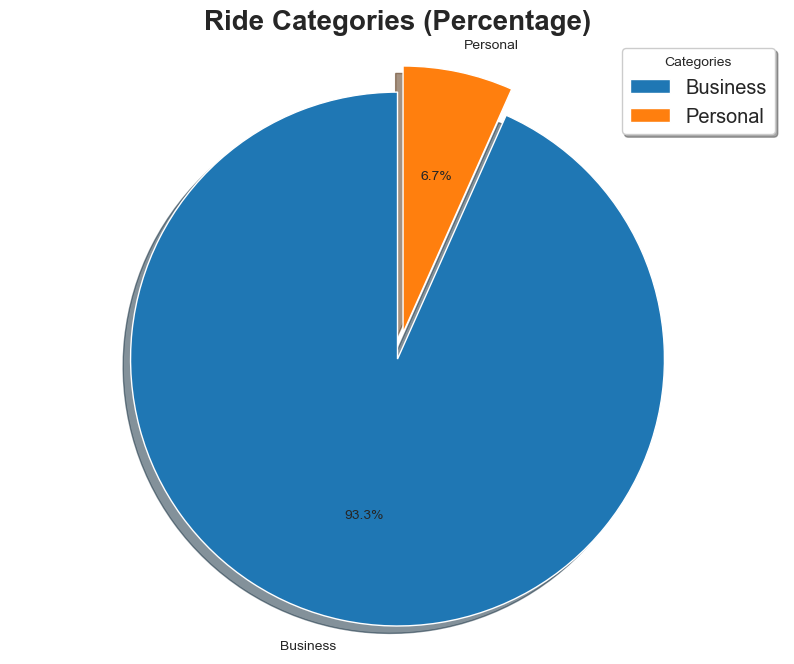

In [ ]:
### TODO: EDA

## univariate analysis

print(df.columns)

sns.set_style('whitegrid')

# categories eda
category_counts = df['CATEGORY'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
         startangle=90, explode=(0.1, 0), shadow=True)
plt.title('Ride Categories (Percentage)', fontsize=20, weight='bold')
plt.axis('equal')
plt.legend(title='Categories', shadow=True, fontsize='x-large')
plt.show()

The Top 10 START Locations:
 START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Karachi              31
Raleigh              28
Westpark Place       17
Name: count, dtype: int64
The Top 10 STOP Locations:
 STOP
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Karachi              28
Apex                 17
Name: count, dtype: int64


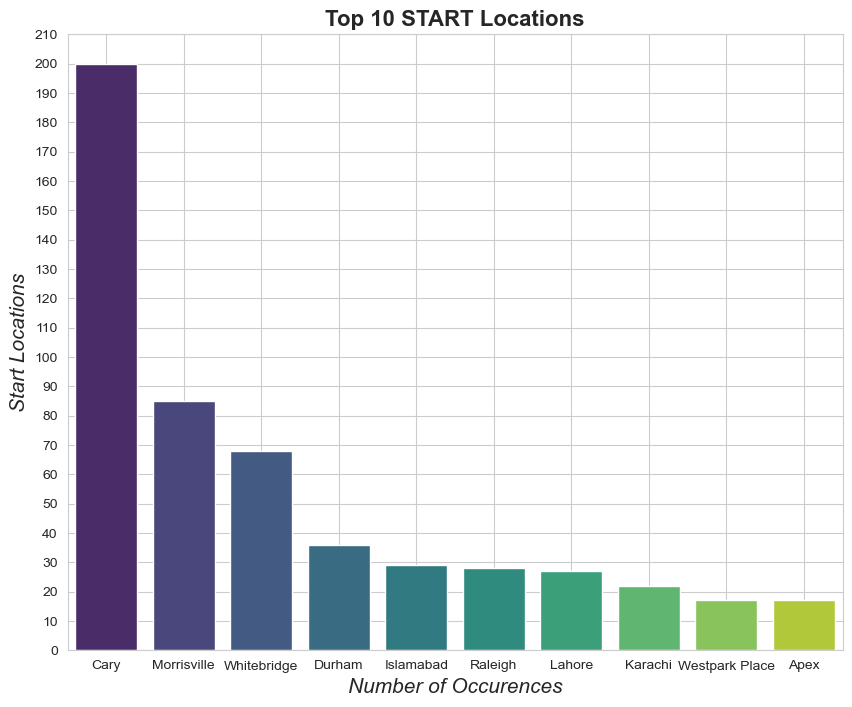

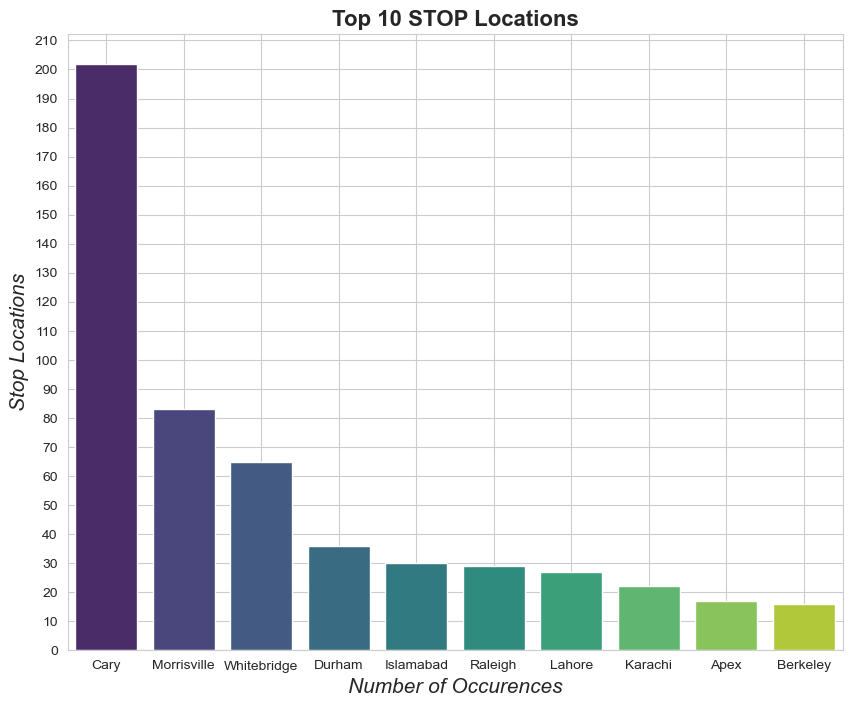

In [129]:
# START/STOP EDA
start_counts = df['START'].value_counts().head(10)
print('The Top 10 START Locations:\n', start_counts)
stop_counts = df['STOP'].value_counts().head(10)
print('The Top 10 STOP Locations:\n', stop_counts)


# START Top 10
# excluding 'Unknown Location'
top_start_counts = df_locations_cleaned['START'].value_counts().head(10)
plt.figure(figsize=(10,8))
start_bp = sns.barplot(x=top_start_counts.index, y=top_start_counts.values, palette='viridis')
start_bp.set_yticks(range(0, 220, 10))
plt.title('Top 10 START Locations', fontsize=16, weight='bold')
plt.xlabel('Number of Occurences', fontstyle='italic', size=15)
plt.ylabel('Start Locations', fontstyle='italic', size=15)
plt.grid(True)
plt.show()


# STOP Top 10
# excluding 'Unknown Location'
top_stop_counts = df_locations_cleaned['STOP'].value_counts().head(10)
plt.figure(figsize=(10,8))
stop_bp = sns.barplot(x=top_stop_counts.index, y=top_stop_counts, palette='viridis')
stop_bp.set_yticks(range(0, 220, 10))
plt.title('Top 10 STOP Locations', fontsize=16, weight='bold')
plt.xlabel('Number of Occurences', fontstyle='italic', size=15)
plt.ylabel('Stop Locations', fontstyle='italic', size=15)
plt.grid(True)
plt.show()

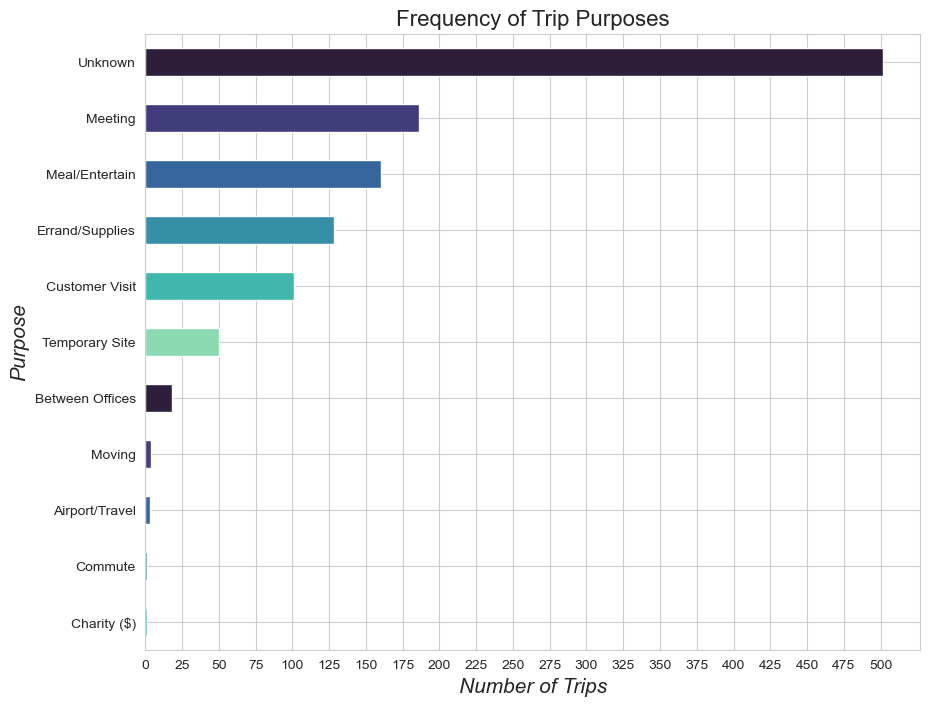

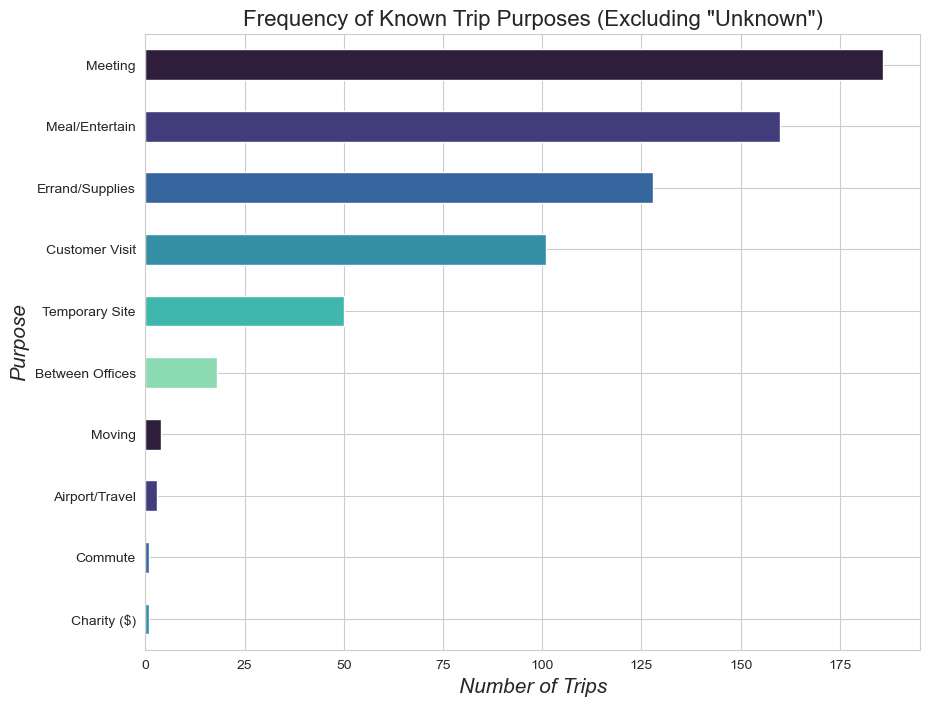

In [130]:
# purpose eda

# bar chart of purposes
purpose_counts = df['PURPOSE'].value_counts()
plt.figure(figsize=(10,8))
purpose_bc = purpose_counts.plot(kind='barh', color = sns.color_palette('mako'))
purpose_bc.set_xticks(range(0, 520, 25))
plt.title('Frequency of Trip Purposes', fontsize=16)
plt.xlabel('Number of Trips', fontstyle='italic', size=15)
plt.ylabel('Purpose', fontstyle='italic', size=15)
plt.gca().invert_yaxis() 
plt.show()

# bar chart of purposes (excluding 'Unknown')
known_purpose_counts = df[df['PURPOSE'] != 'Unknown']['PURPOSE'].value_counts()
plt.figure(figsize=(10, 8))
known_purpose_bc = known_purpose_counts.plot(kind='barh', color=sns.color_palette('mako'))
known_purpose_bc.set_xticks(range(0, 200, 25))
plt.title('Frequency of Known Trip Purposes (Excluding "Unknown")', fontsize=16)
plt.xlabel('Number of Trips', fontstyle='italic', size=15)
plt.ylabel('Purpose', fontstyle='italic', size=15)
plt.gca().invert_yaxis()
plt.show()


MILES Summary Statistics:
 count    1154.000000
mean       10.567418
std        21.588452
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64


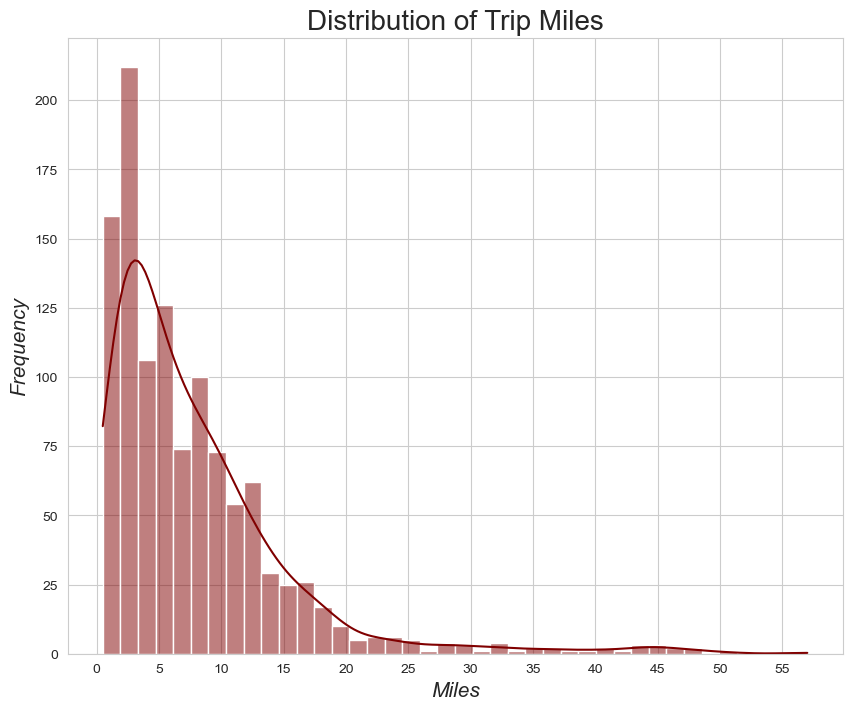

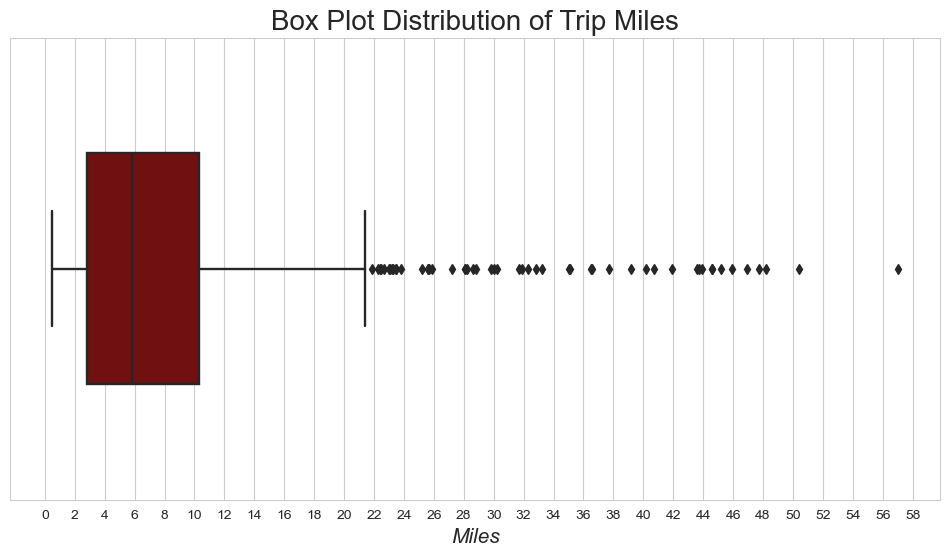

In [131]:
# miles eda

# large range of outliers, need to filter data for a better view
df_miles_cleaned = df[df['MILES'] < 60]

print('MILES Summary Statistics:\n', df['MILES'].describe())

# histogram of miles distribution
plt.figure(figsize=(10,8))
miles_hp = sns.histplot(df_miles_cleaned['MILES'], bins=40, kde=True, color='maroon')
miles_hp.set_xticks(range(0, 60, 5))
plt.xlabel('Miles', size=15, fontstyle='italic')
plt.ylabel('Frequency', size=15, fontstyle='italic')
plt.title('Distribution of Trip Miles', fontsize=20)
plt.show()
# heavily right-skewed data (as expected) with outliers from 40-310 miles

# boxplot of miles distribution
plt.figure(figsize=(12,6))
miles_bp = sns.boxplot(x=df_miles_cleaned['MILES'], orient='h', color='maroon', linewidth=1.7, width=0.5)
miles_bp.set_xticks(range(0, 60, 2))
plt.title('Box Plot Distribution of Trip Miles', fontsize=20)
plt.xlabel('Miles', size=15, fontstyle='italic')
plt.show()


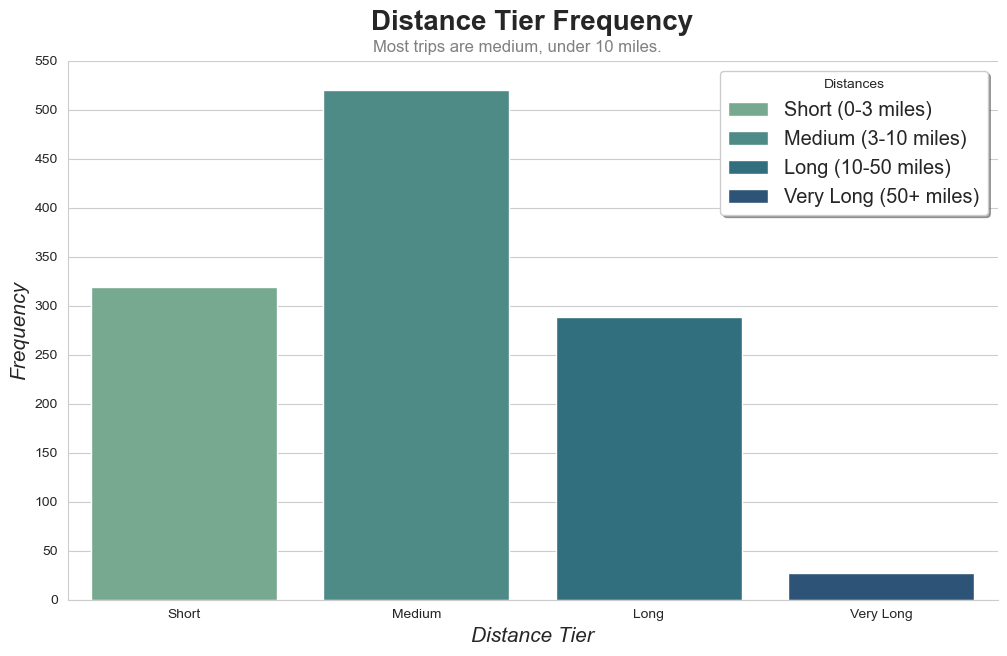

In [132]:
# distance tier eda
# short, medium, long, very long
# 0, 3, 10, 50

dist_counts = df['DISTANCE_TIER'].value_counts()

plt.figure(figsize=(12,7))

dist_bc = sns.barplot(x=dist_counts.index, 
                      y=dist_counts.values, 
                      palette='crest',
                      hue=dist_counts.index,
                      dodge=False
                      )

dist_bc.set_yticks(range(0, 600, 50))
plt.title('Distance Tier Frequency', fontsize=20, weight='bold',pad=22)
plt.suptitle('Most trips are medium, under 10 miles.', y=0.91, fontsize=12, color='gray')
plt.xlabel('Distance Tier', size=15, fontstyle='italic')
plt.ylabel('Frequency', size=15, fontstyle='italic')

new_labels = [
    'Short (0-3 miles)',
    'Medium (3-10 miles)',
    'Long (10-50 miles)',
    'Very Long (50+ miles)'
]

dist_leg = dist_bc.legend(title='Distances', fontsize='x-large', shadow=True)

for text, label in zip(dist_leg.get_texts(), new_labels):
    text.set_text(label)

sns.despine()
plt.show()

DURATION Summary Statistics:
 count    1154.000000
mean       23.241768
std        27.330072
min         0.000000
25%        10.000000
50%        16.000000
75%        27.750000
max       336.000000
Name: DURATION, dtype: float64


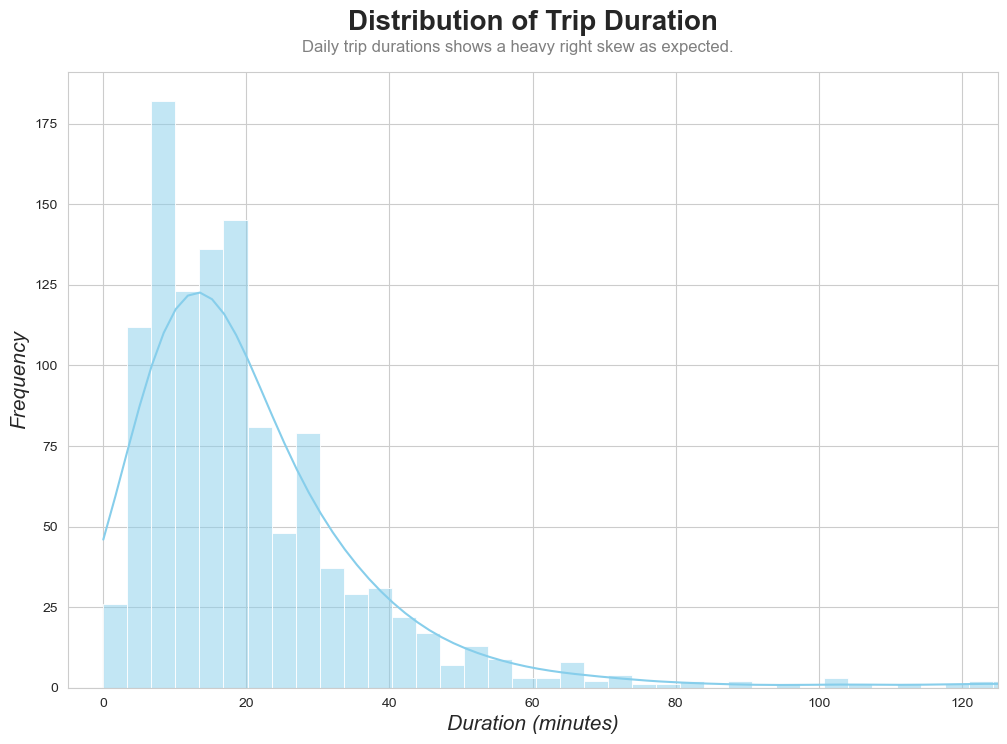

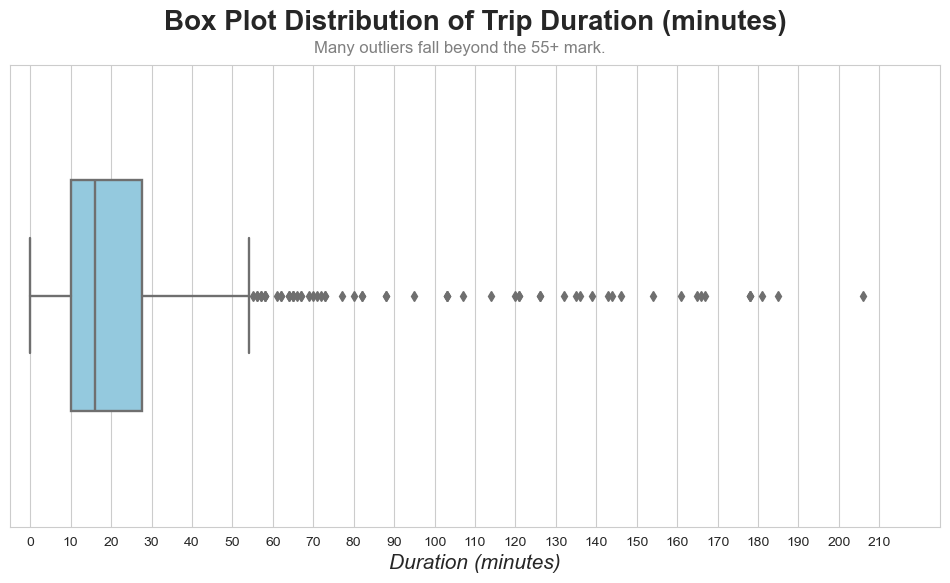

In [133]:
# duration (minutes) eda

print('DURATION Summary Statistics:\n', df['DURATION'].describe())

# histogram of trip duration
plt.figure(figsize=(12,8))
duration_hp = sns.histplot(df['DURATION'], bins=100, kde=True, color='skyblue')
#duration_hp.set_xticks(range(0, 200, 5))
plt.xlabel('Duration (minutes)', size=15, fontstyle='italic')
plt.xlim(-5, 125)
plt.ylabel('Frequency', size=15, fontstyle='italic')
plt.title('Distribution of Trip Duration', fontsize=20, pad=30, weight='bold')
plt.suptitle('Daily trip durations shows a heavy right skew as expected.', y=0.92, fontsize=12, color='gray')
plt.show()
# heavily right-skewed data (as expected) with outliers from 40-310 miles

# boxplot of trip duration
plt.figure(figsize=(12,6))
duration_bp = sns.boxplot(x=df['DURATION'], orient='h', color='skyblue', linewidth=1.7, width=0.5)
duration_bp.set_xticks(range(0, 215, 10))
plt.title('Box Plot Distribution of Trip Duration (minutes)', fontsize=20, weight='bold', pad=25)
plt.suptitle('Many outliers fall beyond the 55+ mark.', y=0.92, fontsize=12, color='gray')
plt.xlabel('Duration (minutes)', size=15, fontstyle='italic')
plt.xlim(-5, 225)
plt.show()

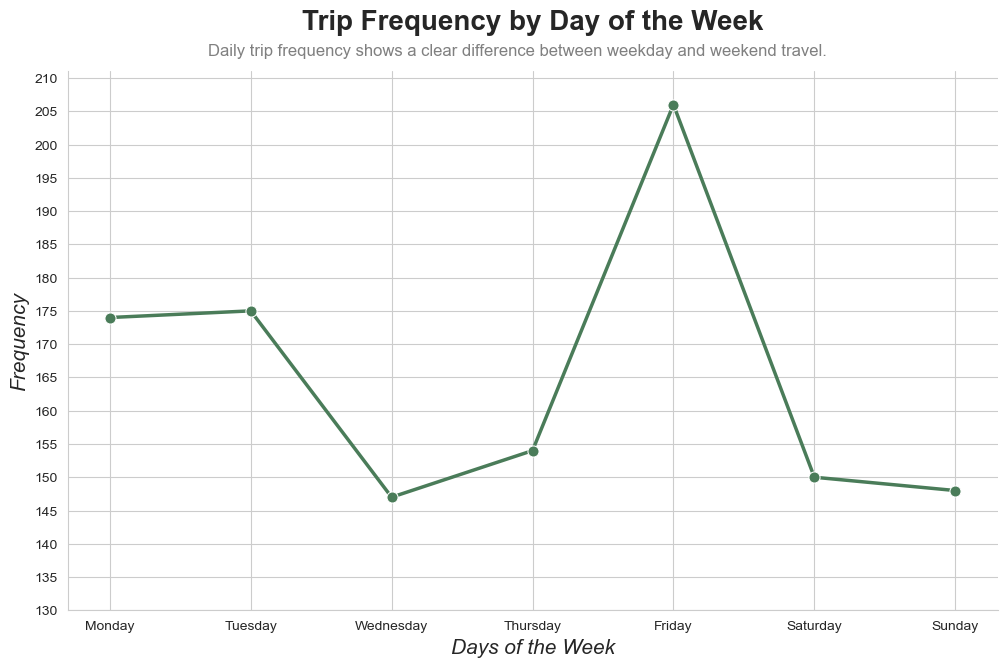

In [134]:
# day of week eda 
day_map = {
    # (0-6 = M-F)
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'
}

# get the frequency of each day of the week
day_info = df['DAY_OF_WEEK'].map(day_map).value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# the the days of the week in order
day_info_sorted = day_info.reindex(day_order)

# print('The frequency of rides for each day of the week:\n',day_info)

# frequency of ride on each day of the week (bar chart)
    # plt.figure(figsize=(10,6))
    # day_bc = sns.barplot(x=day_info_sorted.index, y=day_info_sorted.values, palette='flare')
    # day_bc.set_yticks(range(0, 215, 15))
    # plt.xlabel('Days of the Week', size=15, fontstyle='italic')
    # plt.ylabel('Frequency', size=15, fontstyle='italic')
    # plt.title('Distribution of Days of the Week', fontsize=20)
    # plt.show()


# frequency of ride on each day of the week (line plot)
plt.figure(figsize=(12,7))
day_lp = sns.lineplot(
    x=day_info_sorted.index,
    y=day_info_sorted.values, 
    color='#4a7c59', 
    marker='o', 
    markersize=8, 
    linewidth=2.5 ,
    sort=False)
day_lp.set_yticks(range(130, 220, 5))
plt.xlabel('Days of the Week', size=15, fontstyle='italic')
plt.ylabel('Frequency', size=15, fontstyle='italic')
plt.title('Trip Frequency by Day of the Week', fontsize=20, weight='bold', pad=30)
plt.suptitle('Daily trip frequency shows a clear difference between weekday and weekend travel.', y=0.92, fontsize=12, color='gray')
plt.ylim(130, day_info_sorted.values.max() + 5) 
plt.grid(True)
sns.despine()
plt.show()


In [ ]:
## multivariate analysis

# time of day + purpose + miles

# day of the week + category + duration minutes


['Meal/Entertain' 'Unknown' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']
['Business' 'Personal']
